# Installing relevant packages

In [1]:
pip install scikit-learn

In [2]:
pip install numpy

In [3]:
pip install pandas

In [4]:
pip install nltk

In [5]:
pip install matplotlib

In [6]:
pip install imblearn

# Importing

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from nltk.stem.porter import PorterStemmer
import nltk
import re, string
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics

# Loading Data

In [8]:
import pandas as pd

df = pd.read_csv('cyberbullying.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0
4,@RudhoeEnglish This is an ISIS account pretend...,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81417 entries, 0 to 81416
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          81417 non-null  object
 1   cyberbullying_type  81417 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [10]:
print(df.columns)



Index(['tweet_text', 'cyberbullying_type'], dtype='object')


In [11]:
df = df.rename(columns={'cyberbullying_type': 'annotation'})

df = df.rename(columns={'tweet_text': 'content'})

print(df.columns)

Index(['content', 'annotation'], dtype='object')


In [12]:
df.shape

(81417, 2)

# Visualization

<Axes: xlabel='annotation'>

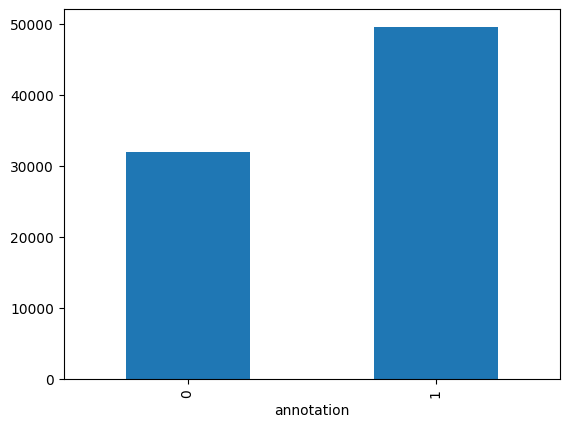

In [13]:
df['annotation'].value_counts().sort_index().plot.bar()

In [14]:
#Biasness
print("PosiNon cyber trollingtive: ", df.annotation.value_counts()[0]/len(df.annotation)*100,"%")
print("Cybertrolling: ", df.annotation.value_counts()[1]/len(df.annotation)*100,"%")

PosiNon cyber trollingtive:  39.14293083754007 %
Cybertrolling:  60.85706916245993 %


# Preprocessing

In [15]:
nltk.download('stopwords')
stop = stopwords.words('english')

regex = re.compile('[%s]' % re.escape(string.punctuation))

def test_re(s):
    return regex.sub('', s)

df ['content_without_stopwords'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df ['content_without_puncs'] = df['content_without_stopwords'].apply(lambda x: regex.sub('',x))
del df['content_without_stopwords']
del df['content']
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,annotation,content_without_puncs
0,0,In words katandandre food crapilicious mkr
1,0,Why aussietv white MKR theblock ImACelebrityAU...
2,0,XochitlSuckkks classy whore Or red velvet cupc...
3,0,JasonGio meh P thanks heads up concerned anoth...
4,0,RudhoeEnglish This ISIS account pretending Kur...
...,...,...
81412,0,Happy birthday paullander
81413,0,RT MilradJalen raesanni I agree it’s awful mak...
81414,0,I called yesterday Guidance Counselors office ...
81415,0,Jeickythecat skwi69 Thanks


In [16]:
#Stemming
porter_stemmer = PorterStemmer()
#punctuations
nltk.download('punkt')
tok_list = []
size = df.shape[0]

for i in range(size):
  word_data = df['content_without_puncs'][i]
  nltk_tokens = nltk.word_tokenize(word_data)
  final = ''
  for w in nltk_tokens:
    final = final + ' ' + porter_stemmer.stem(w)
  tok_list.append(final)

df['content_tokenize'] = tok_list
del df['content_without_puncs']
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,annotation,content_tokenize
0,0,in word katandandr food crapilici mkr
1,0,whi aussietv white mkr theblock imacelebritya...
2,0,xochitlsuckkk classi whore or red velvet cupcak
3,0,jasongio meh p thank head up concern anoth an...
4,0,rudhoeenglish thi isi account pretend kurdish...
...,...,...
81412,0,happi birthday paulland
81413,0,rt milradjalen raesanni i agre it ’ s aw make...
81414,0,i call yesterday guidanc counselor offic i th...
81415,0,jeickythecat skwi69 thank


In [17]:
noNums = []
for i in range(len(df)):
  noNums.append(''.join([i for i in df['content_tokenize'][i] if not i.isdigit()]))

df['content'] = noNums
df

,annotation,content_tokenize,content
0,0,in word katandandr food crapilici mkr,in word katandandr food crapilici mkr
1,0,whi aussietv white mkr theblock imacelebritya...,whi aussietv white mkr theblock imacelebritya...
2,0,xochitlsuckkk classi whore or red velvet cupcak,xochitlsuckkk classi whore or red velvet cupcak
3,0,jasongio meh p thank head up concern anoth an...,jasongio meh p thank head up concern anoth an...
4,0,rudhoeenglish thi isi account pretend kurdish...,rudhoeenglish thi isi account pretend kurdish...
...,...,...,...
81412,0,happi birthday paulland,happi birthday paulland
81413,0,rt milradjalen raesanni i agre it ’ s aw make...,rt milradjalen raesanni i agre it ’ s aw make...
81414,0,i call yesterday guidanc counselor offic i th...,i call yesterday guidanc counselor offic i th...
81415,0,jeickythecat skwi69 thank,jeickythecat skwi thank


In [18]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True, sublinear_tf=True)
tfIdf = tfIdfVectorizer.fit_transform(df.content.tolist())

In [19]:
print(tfIdf)

  (0, 38576)	0.22355748513547696
  (0, 10910)	0.6394503998390142
  (0, 17377)	0.37730216632957364
  (0, 32699)	0.46760307558175374
  (0, 61779)	0.3005179442707295
  (0, 29353)	0.29967422502847285
  (1, 15561)	0.20872346369091163
  (1, 61723)	0.3745703382061862
  (1, 40482)	0.3378572375645212
  (1, 54010)	0.31117294346298
  (1, 54371)	0.34179327622578176
  (1, 57151)	0.18429888102817973
  (1, 29151)	0.33115128359483964
  (1, 55973)	0.36495666376647157
  (1, 61141)	0.15493974338742011
  (1, 3502)	0.3745703382061862
  (1, 61098)	0.17336156012263504
  (1, 38576)	0.13095308539458514
  (2, 11327)	0.40362174237950443
  (2, 59701)	0.4558091848649118
  (2, 47510)	0.3053581143314858
  (2, 42691)	0.26631961185522707
  (2, 61247)	0.2815849487826195
  (2, 9484)	0.3639041759213763
  (2, 62254)	0.5034296671736695
  :	:
  (81413, 38688)	0.26589231525476
  (81413, 36502)	0.14267356198924092
  (81413, 30340)	0.12448879450892686
  (81413, 34269)	0.19387086037887277
  (81413, 48971)	0.1281566333369648
  (

In [20]:
print(tfIdf.shape) # means total rows  20001 with 14783 features

(81417, 63441)


In [21]:
df2 = pd.DataFrame(tfIdf[2].T.todense(), index=tfIdfVectorizer.vocabulary_.keys(), columns=["TF-IDF"])
df2 = df2.sort_values('TF-IDF', ascending=False)
print(df2.head(10))

                    TF-IDF
httpstcoybtrarrk  0.503430
benjamincol       0.455809
httpsâ            0.403622
sfsu              0.363904
onyal             0.305358
httptcouokd       0.281585
volvo             0.266320
havehad           0.000000
claims            0.000000
whitenegro        0.000000


In [22]:
dfx = pd.DataFrame(tfIdf.toarray(), columns = tfIdfVectorizer.vocabulary_.keys())
print(dfx)

        in  word  katandandr  food  crapilici  mkr  whi  aussietv  white  \
0      0.0   0.0         0.0   0.0        0.0  0.0  0.0       0.0    0.0   
1      0.0   0.0         0.0   0.0        0.0  0.0  0.0       0.0    0.0   
2      0.0   0.0         0.0   0.0        0.0  0.0  0.0       0.0    0.0   
3      0.0   0.0         0.0   0.0        0.0  0.0  0.0       0.0    0.0   
4      0.0   0.0         0.0   0.0        0.0  0.0  0.0       0.0    0.0   
...    ...   ...         ...   ...        ...  ...  ...       ...    ...   
81412  0.0   0.0         0.0   0.0        0.0  0.0  0.0       0.0    0.0   
81413  0.0   0.0         0.0   0.0        0.0  0.0  0.0       0.0    0.0   
81414  0.0   0.0         0.0   0.0        0.0  0.0  0.0       0.0    0.0   
81415  0.0   0.0         0.0   0.0        0.0  0.0  0.0       0.0    0.0   
81416  0.0   0.0         0.0   0.0        0.0  0.0  0.0       0.0    0.0   

       theblock  ...  httpstcopptooynt  akiresaur  shaileemodi  paulland  \
0          

In [23]:
def display_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.vocabulary_.keys(),
                 np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    i=0
    for item in sorted_scores:
        print ("{0:50} Score: {1}".format(item[0], item[1]))
        i = i+1
        if (i > 25):
          break

In [24]:
#top 25 words
display_scores(tfIdfVectorizer, tfIdf)

prone                                              Score: 1652.017356128536
foreverpeaz                                        Score: 1396.758369274863
httpstcojwhpawoaf                                  Score: 1271.3115426933452
rapperguydmv                                       Score: 1187.0797858667408
universitywatc                                     Score: 1182.2484514176926
ambedkar                                           Score: 1059.5688622340508
tashuurrxrt                                        Score: 1033.1319053134957
kami                                               Score: 1023.3439651768953
remix                                              Score: 955.2907553503716
busi                                               Score: 952.9372595435485
shcool                                             Score: 943.6268684583924
timesa                                             Score: 943.0741097960558
ahhhaaahunni                                       Score: 928.9685125924051
oompa 

In [ ]:
X=tfIdf.toarray()
y = np.array(df.annotation.tolist())
#Spltting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
#Training data biasness
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

In [ ]:
#Test Data
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

In [ ]:
#Random oversampling on training data
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [ ]:
print(X_over.shape)
print(y_over.shape)

In [ ]:
unique_elements, counts_elements = np.unique(y_over, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

# Training and Calculating Scores

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def getStatsFromModel(model):
    print(classification_report(y_test, y_pred))

    # Get predicted probabilities or scores
    y_score = model.predict_proba(X_test)[:, 1]

    # Calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)

    # Plot precision-recall curve
    plt.figure()
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('2-class Precision-Recall curve')

    # Calculate ROC AUC
    logit_roc_auc = roc_auc_score(y_test, y_score)

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    plt.figure()
    plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

## Normal Methods

In [ ]:
#Supervised Methods
# 3 normal methods
# 2 ensemble methods
# gnb = GaussianNB()
# gnbmodel = gnb.fit(X_over, y_over)
# y_pred = gnbmodel.predict(X_test)
# print ("Score:", gnbmodel.score(X_test, y_test))
# print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
# getStatsFromModel(gnb)

In [ ]:
# lgr = LogisticRegression()
# lgr.fit(X_over, y_over)
# y_pred = lgr.predict(X_test)
# print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
# print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
# getStatsFromModel(lgr)

In [ ]:
# xgb = XGBClassifier()
# xgb_model = xgb.fit(X_over, y_over)
# y_pred = xgb_model.predict(X_test)
# print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
# print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

# # Generate and plot additional metrics
# getStatsFromModel(xgb_model)

## Ensemble Methods

In [ ]:
#Ensemble methods from here
# abc = AdaBoostClassifier()
# abc.fit(X_over, y_over)
# y_pred = abc.predict(X_test)
# print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
# print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
# getStatsFromModel(abc)

In [ ]:
rfc = RandomForestClassifier(verbose=True) #uses randomized decision trees
rfcmodel = rfc.fit(X_over, y_over)
y_pred = rfc.predict(X_test)
print ("Score:", rfcmodel.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(rfc)

## Requires High RAM and processing time - Not used

In [ ]:
# Model, SVM
# from sklearn import svm


# clf = svm.SVC(kernel='linear', verbose=True)
# clf.fit(X_over, y_over)
# y_pred = clf.predict(X_test)
# print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
# print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
# getStatsFromModel(clf)

In [ ]:
# from sklearn.neural_network import MLPClassifier
# mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,10), max_iter=200, verbose=True)
# mlp.fit(X_over,y_over)
# print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
# getStatsFromModel(mlp)